<a href="https://colab.research.google.com/github/Ashwitha-bhukya/practice_projects/blob/main/online_shopping_intention_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this article, I’m going to introduce you to a data science project on online shopping intention analysis with Python. The growing popularity of online shopping has led to the emergence of new economic activities. To be successful in a highly competitive eCommerce environment, it is essential to understand customers’ online purchase intent.

**Introduction to Online Shopping Intention Analysis**

In recent years, e-commerce has brought huge benefits to suppliers and consumers. Defined as the use of the Internet to sell products or services to individual consumers, e-commerce has profoundly changed the way people conduct their business.

With the growth of online shopping, it has become important to understand the factors that influence a consumer’s intention to buy from a website rather than just browse. This emerging topic is of interest to both academics and machine learning practitioners.


**Online Shopping Intention Analysis with Pythont**

In this section, I will take you through a Data Science Project on Online Shopping Intention analysis with Python. I will start with this task by importing the necessary libraries and the data:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [ ]:
# import dataset
df= pd.read_csv("/content/online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**Now have a look at product related bounce rates of customers:**

In [ ]:
x = df.iloc[:, [5, 6]].values

In [ ]:
x.shape

(12330, 2)

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

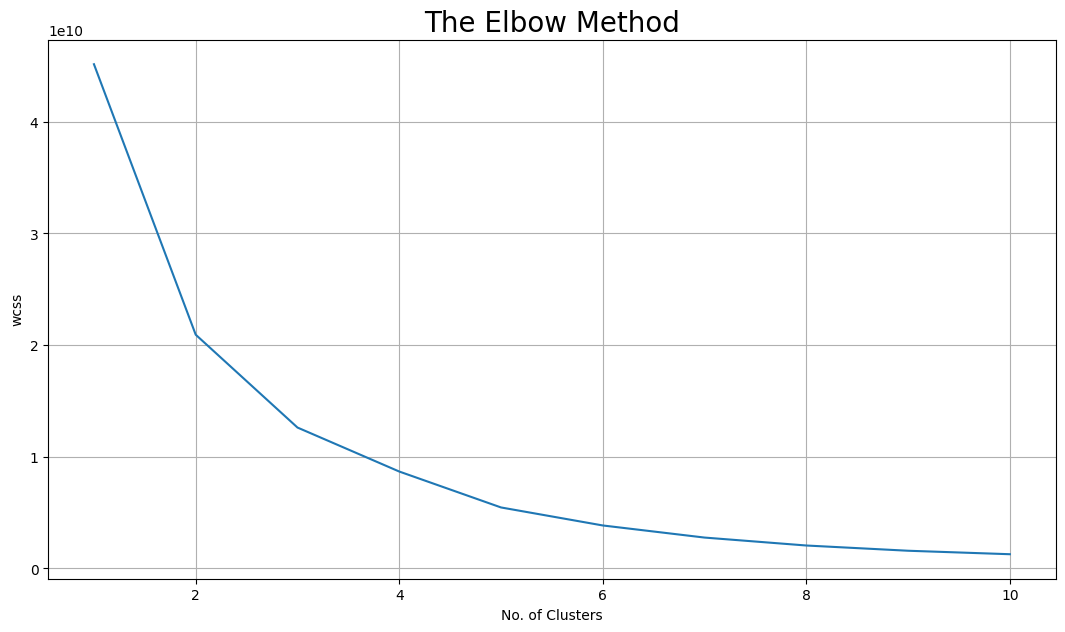

In [ ]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='full', tol=0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means method and plot the clusters:

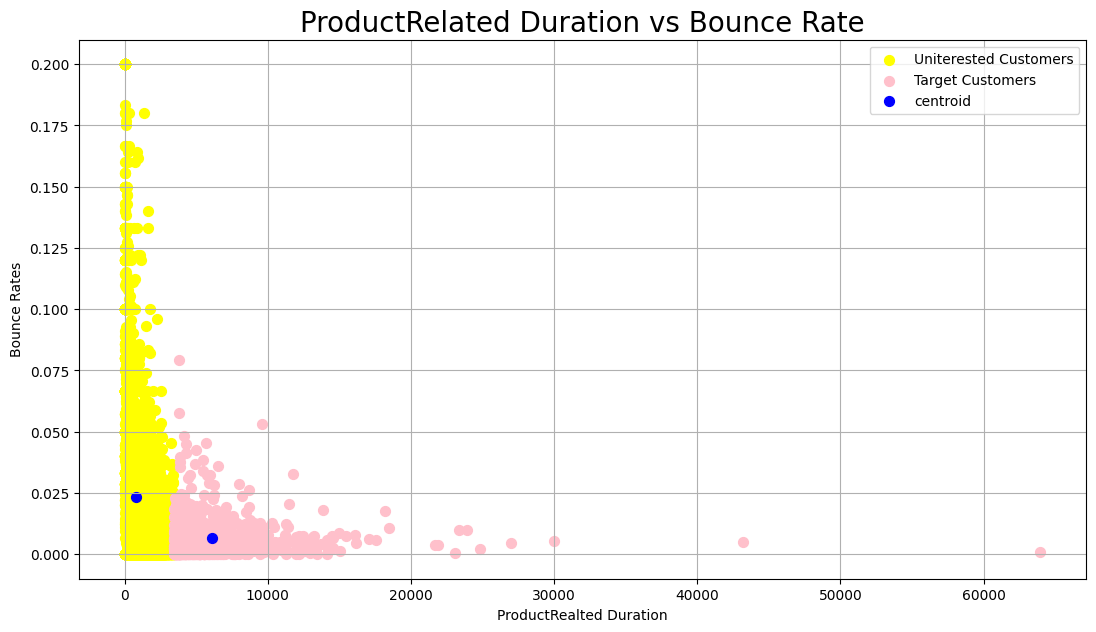

In [ ]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label='Uniterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='centroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize=20)
plt.grid()
plt.xlabel('ProductRealted Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers):

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
labels_true = le.fit_transform(df['Revenue'])

In [ ]:
labels_pred = y_means

In [ ]:
from sklearn import metrics

In [ ]:
score = metrics.adjusted_rand_score(labels_true, labels_pred)

In [ ]:
print("Adjusted rand index: ")
print(score)

Adjusted rand index: 
0.08359442469281096


In [ ]:
!pip install scikit-plot


In [ ]:
!pip install scikit-plot
import scikitplot as skplt


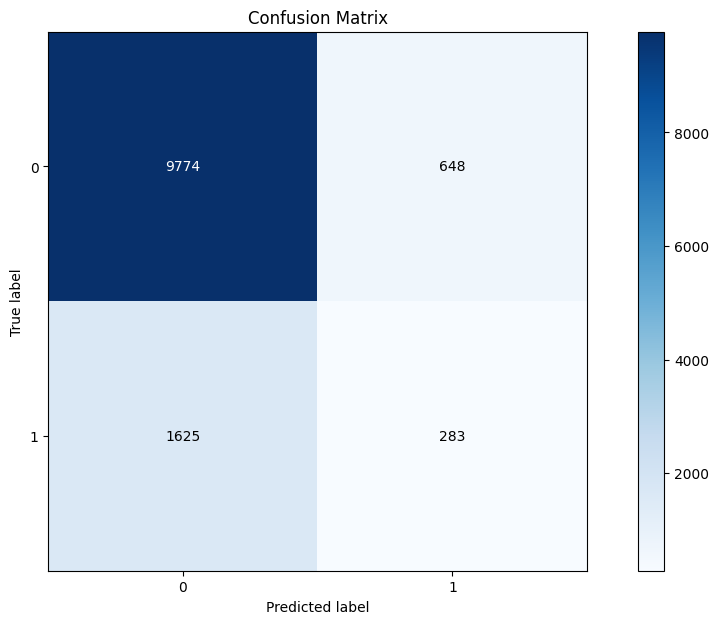

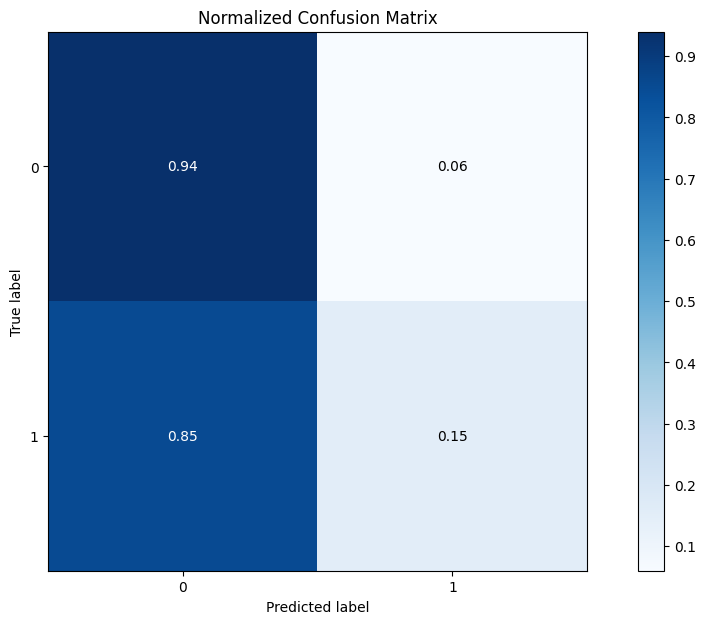

In [ ]:
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

***Observations From Above Plots:***

From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.

So it is clear that we have poorly bundled many successful revenue sessions as uninterested customers, which means when the high bounce rate combined with a short product-related page duration, there are still a lot of customers. targets.

I hope you liked this article on Data Science Project on Online Shopping Intention Analysis with Python programming language. Feel free to ask your valuable questions in the comments section below.